In [56]:
import h5py
import json
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import pprint
import random
import skimage.io as io
from random import randint

To get the results file from Google Storage bucket (assuming you have access):


`gsutil cp gs://path_to_file .`


In [13]:
# Best model
probs_path = '/home/mwinton/report_results/attn_probs/attention_prob_mrr_san_expt28_2018-12-07-00:47:53.hdf5'
json_results_path = '/home/mwinton/report_results/test2015_results_mrr_san_expt28_2018-12-07-00:47:53.json'

In [23]:
probs = []

with h5py.File(probs_path, 'r') as f:
    for k in f.keys():
        print(k)
        probs.append(np.array(f.get(k)))

with open(json_results_path) as f:
    resultsj = json.load(f)


attention_probabilites0
attention_probabilites1


In [24]:
test_set_length = len(resultsj)
print('json results length: {}'.format(test_set_length))

print('# datasets:',len(probs))
for i in range(len(probs)):
    print('dataset {} padded shape: {}'.format(i, probs[i].shape))
    probs[i] = probs[i][:test_set_length]
    print('dataset {} truncated to: {}'.format(i, probs[i].shape))



json results length: 52213
# datasets: 2
dataset 0 padded shape: (52300, 196, 1)
dataset 0 truncated to: (52213, 196, 1)
dataset 1 padded shape: (52300, 196, 1)
dataset 1 truncated to: (52213, 196, 1)


In [25]:
# sample
resultsj[0]

{'predicted_answer': 'white',
 'question_id': 5161941,
 'question_str': 'what color is the cat',
 'question_type': 'what color is the',
 'complement_id': None,
 'image_id': 516194,
 'answer_id': 51619410,
 'answer_str': 'black and white',
 'one_hot_index': 32,
 'answer_type': 'other',
 'annotations': ['black and white',
  'black and white',
  'black and white',
  'black and white',
  'black and white',
  'black and white',
  'black and white',
  'black and white',
  'black and white',
  'black and white']}

In [61]:
def get_image_path(img_id):
    ID_DIGITS = 12
    img_id_len = len(str(img_id))
    img_path = '/home/mwinton/vqa_data/images/mscoco/val2014/COCO_val2014_{}{}.jpg'.format((ID_DIGITS - img_id_len)*'0', img_id)
    return img_path

In [88]:
def show_image(img_path):
    if os.path.isfile(img_path):
        image = io.imread(img_path)
        plt.imshow(image)
        plt.axis('off')
        plt.show()
    return image.shape

In [89]:
num_samples = 3
rand_indices = [randint(0, len(resultsj)) for s in range(0, num_samples)]
rand_results, rand_image_id, rand_image_path, rand_question_str, rand_answer_str = [], [], [], [], []

for i in rand_indices:
    rand_results.append(resultsj[i])
    rand_image_id.append(resultsj[i]['image_id'])
    rand_image_path.append(get_image_path(resultsj[i]['image_id']))
    rand_question_str.append(resultsj[i]['question_str'])
    rand_answer_str.append(resultsj[i]['answer_str'])
    
# pprint.pprint (rand_results)
print (rand_indices)
print (rand_image_id)
print (rand_image_path)
print (rand_question_str)
print (rand_answer_str)



[16906, 3694, 33502]
[113173, 561128, 197997]
['/home/mwinton/vqa_data/images/mscoco/val2014/COCO_val2014_000000113173.jpg', '/home/mwinton/vqa_data/images/mscoco/val2014/COCO_val2014_000000561128.jpg', '/home/mwinton/vqa_data/images/mscoco/val2014/COCO_val2014_000000197997.jpg']
['is this a competition', 'is this an advertisement for an appliance store', 'are there passengers in the bus']
['no', 'yes', 'no']


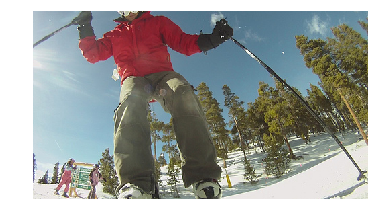

/home/mwinton/vqa_data/images/mscoco/val2014/COCO_val2014_000000113173.jpg (281, 500, 3)


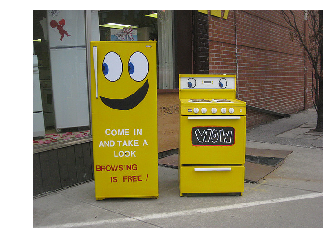

/home/mwinton/vqa_data/images/mscoco/val2014/COCO_val2014_000000561128.jpg (480, 640, 3)


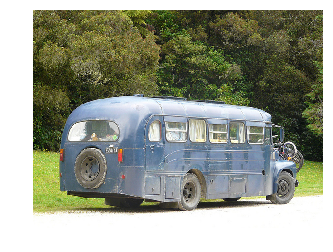

/home/mwinton/vqa_data/images/mscoco/val2014/COCO_val2014_000000197997.jpg (480, 640, 3)


In [91]:
for p in rand_image_path:
    image_dims = show_image(p)
    print(p, image_dims)


In [71]:
# probs[0][29074,:,:]

In [83]:
rand_attn0, rand_attn1 = [], []
rand_reshaped0, rand_reshaped1 = [], []

for i in rand_indices:
    rand_attn0.append(probs[0][i,:,:])
    rand_reshaped0.append(np.reshape(probs[0][i,:,:], (14,14)))
    rand_attn1.append(probs[1][i,:,:])
    rand_reshaped1.append(np.reshape(probs[1][i,:,:], (14,14)))
    
# print an example
# print(rand_attn0[1].shape, rand_attn0[1])
# print(rand_reshaped0[1].shape, rand_reshaped0[1])

(14, 14) [[0.00149754 0.00163719 0.00163921 0.00174691 0.00192467 0.00141553
  0.001558   0.00147544 0.0016417  0.00165556 0.00181751 0.00183831
  0.00180826 0.00199344]
 [0.00145171 0.0020896  0.00249926 0.00191761 0.00124059 0.00091953
  0.00084311 0.00098187 0.00102162 0.00127873 0.00213616 0.00257931
  0.00184576 0.00210056]
 [0.0012901  0.00212903 0.00298404 0.00349304 0.00214433 0.00072299
  0.00068457 0.00087708 0.00066584 0.00067101 0.00092224 0.00146851
  0.00156138 0.00122373]
 [0.00135645 0.0017778  0.00419668 0.00312508 0.00395078 0.0024528
  0.00225912 0.00314782 0.00125809 0.00217641 0.00217996 0.00149435
  0.00103759 0.00076324]
 [0.00133346 0.00180538 0.00379727 0.00281403 0.00435904 0.00296955
  0.00516769 0.00779303 0.00343138 0.00346438 0.00661059 0.00348022
  0.00286776 0.00139783]
 [0.00136616 0.00141265 0.00170465 0.00191067 0.00326226 0.00495679
  0.01587882 0.0285263  0.02164927 0.0106139  0.0081823  0.00550472
  0.00577472 0.00144455]
 [0.00169427 0.00162062 0.